# COS20083 Advanced Data Analytics

## Assignment 2: Classification

### Semester 1, 2023

#### Group 1
#### Group Name: Green Tea
#### Group Members: 
##### Peter Tiew Hieng TING (101226836)
##### Vibatha Naveen Jayakody JAYAKODY ARACHCHILAGE (101232163)

### 1. Introduction

The purpose of this assignment is to build two models, one from machine learning while the other from deep learning, to predict whether the breast cancer is malignant or benign using the data collected from https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data to train both models. By providing the needed information to the models, both models will predict whether it is malignant or benign. This is to benefit the doctors and patients to better identify whether the breast cancer is malignant or benign so that actions can be taken as soon as possible based on the result of the prediction.

### 2. Data Collection

#### 2.1 Data Collection Process Explanation

The data is collected from https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data whereby it consists of 30 features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass to describe the characteristics of the cell nuclei present in the image.

The features consists of 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst' and 'fractal_dimension_worst' whereby all of them are in numerical format.

The column 'id' is drop out since it is unwanted for this classification.

#### 2.2 Codes for Data Collection 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from six import StringIO  
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

import pydotplus  ### need to install if using anaconda
import graphviz ### need to install and add path to env if using anaconda
from IPython.display import Image

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# Read dataset and drop id
df = pd.read_csv('Datasets/data.csv')
df = df.drop('id', axis=1)

### 3. Exploratory Data Analysis

#### 3.1 Exploratory Data Analysis Process Explanation

Dataset is first checked for any missing values or unusable columns and also to see the type of features present. The two classes of the target varibale 'diagnosis' is also mapped to numeric values, a bar plot is used to visualize the proportion of each class. Furthermore histograms visualize their skewnes. 

Overlay histograms are also used show the difference of the two different populations(malignant and benign). A correlation analysis is carried out to show the strength of the relationship between the target variable and the features. This is combined with a pairplot to investigate which of the features are correlated with each other.

PCA is carried out as well to get a reduced dataset, the principal components that were generated will be used create seperated model to compare the performance with the model built from selected features.

#### 3.2 Codes for Exploratory Data Analysis

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The dataset has an unamed column 'Unnamed: 32' which needs to be dropped from the dataframe

In [4]:
df.drop("Unnamed: 32",axis=1,inplace=True) #Drop unusable column 'Unamed: 32'

print("Total Missing values in dataset: "+str(df.isnull().sum().sum())) #Check for missing values

Total Missing values in dataset: 0


Dataset has no missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

All features of the dataset except for the categorical variable 'diagnosis' are decimal values (float64)

##### Univariate Analysis

###### Target Attribute 'diagnosis'

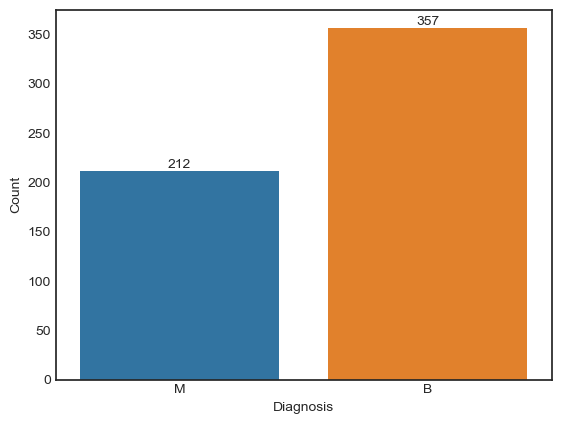

In [6]:
ax = sns.countplot(x='diagnosis', data=df)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')
plt.show()

The target Attribute has two classes, 'M' which represents a malignant nodule(Cancer) and 'B' which represents a benign nodule(Non cancer). There 212 malignant samples and 357 benign samples in the dataset as shown in the bar chart above. The 'diagnosis' will be modified so that 'B' will be mapped as 0 and 'M' as 1.

In [7]:
# Map diagnosis columns with 0 as B and 1 as M
df.diagnosis = df.diagnosis.map({'B':0, 'M':1})

###### Features

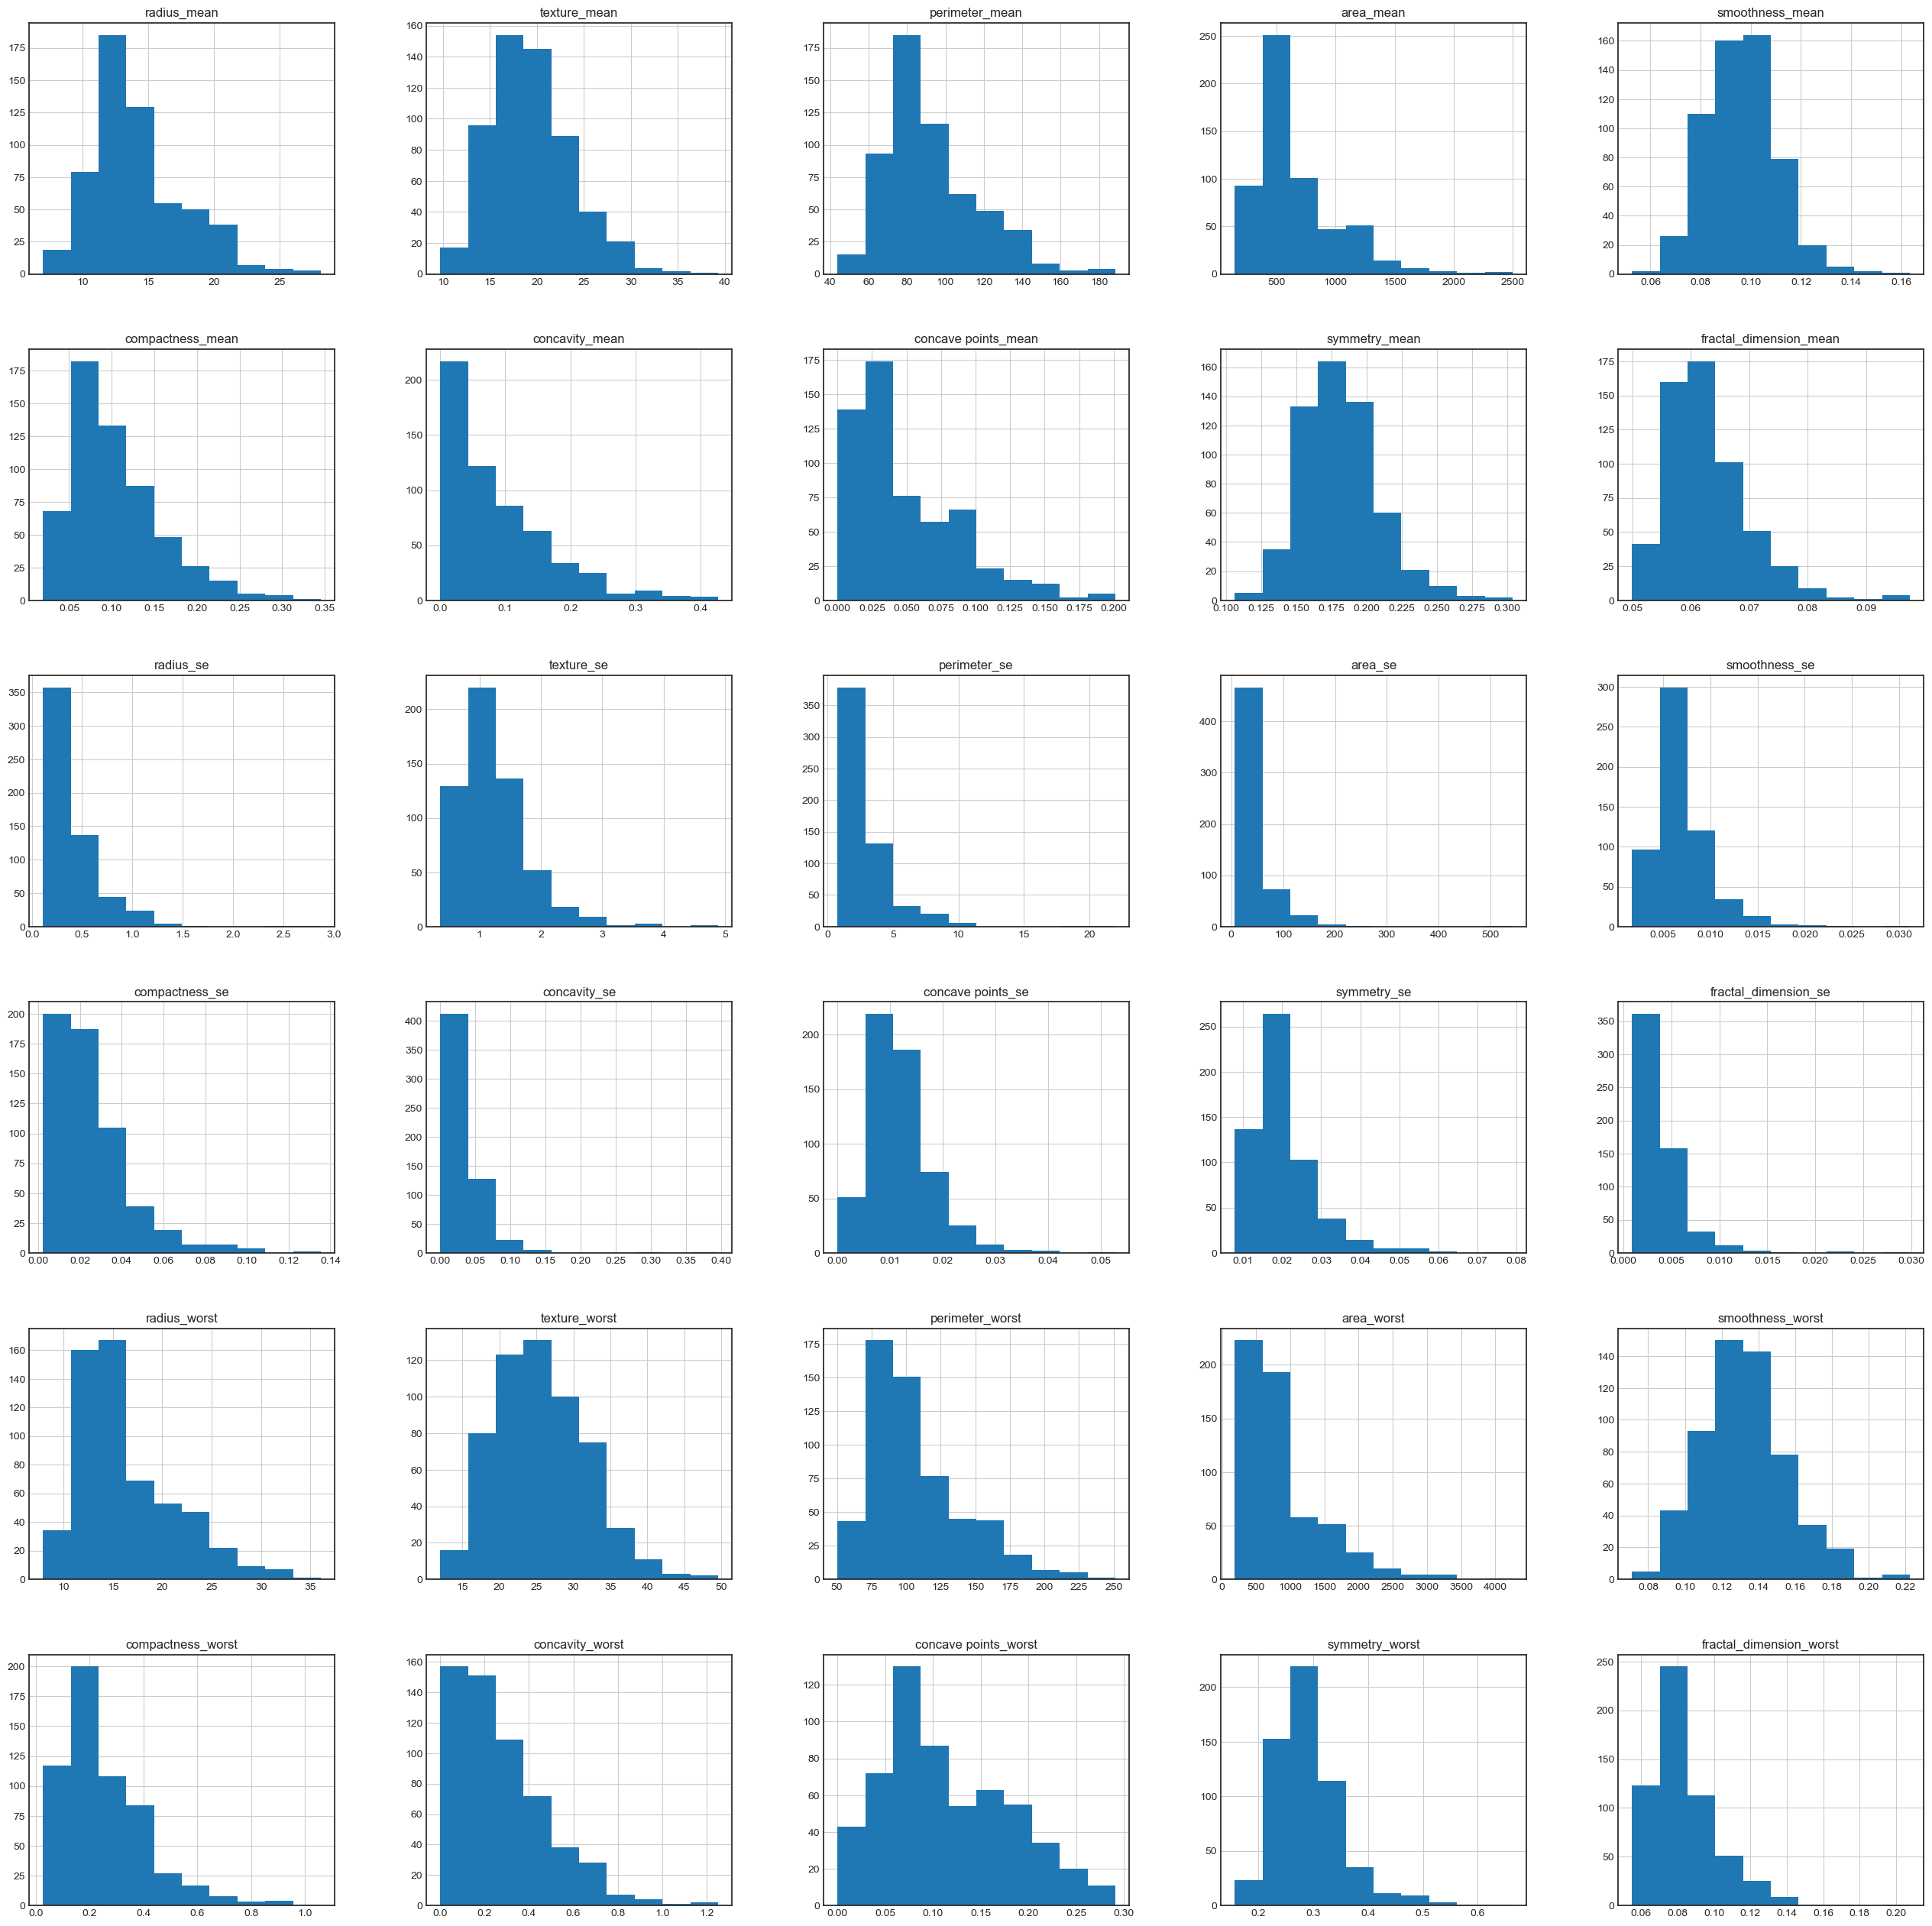

In [8]:
df.drop('diagnosis', axis=1).hist(figsize=(32,32))
plt.show()

Majority of the distributions of the features are very positively skewed, with the distribution peaking early and then starts to decrease causing the distribution to stretch to the positive and also becomes shorter.

In [9]:
df.drop('diagnosis', axis=1).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


###### Relatioship Between Classes and Features

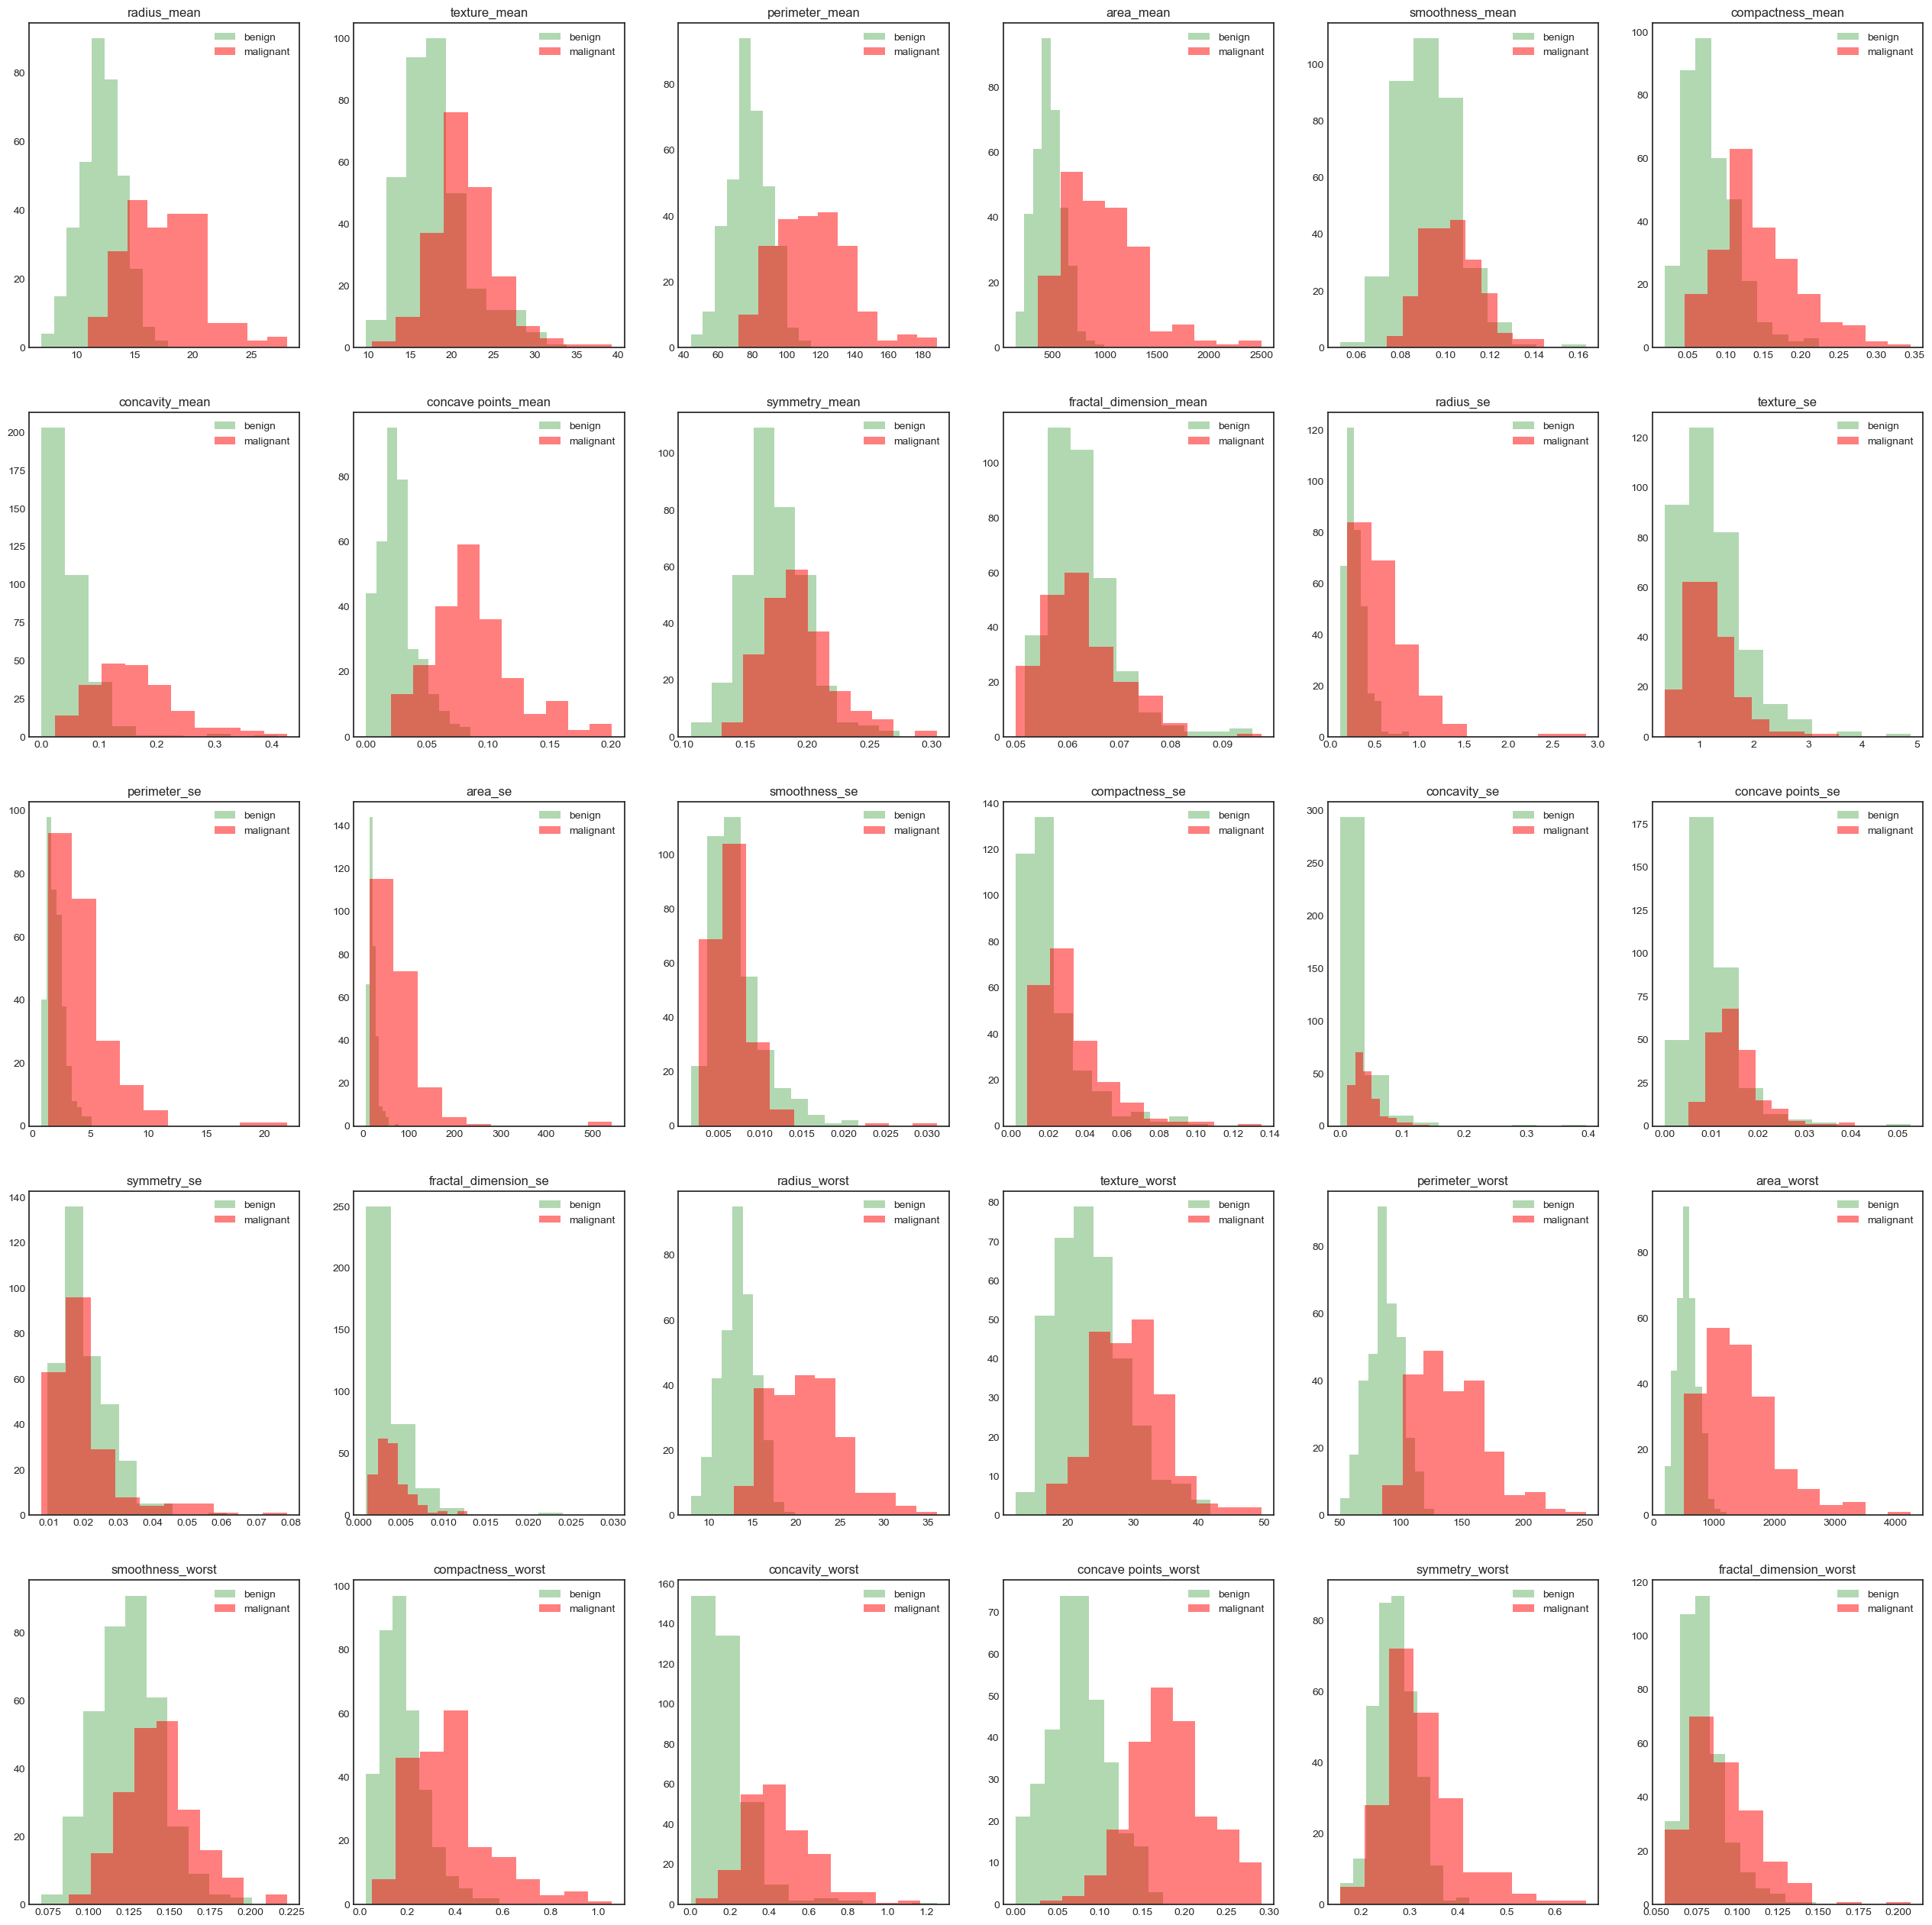

In [10]:
# 5x6 30 histograms one for each feature
_, axes = plt.subplots(5, 6, figsize=(32, 32))
benign = df.loc[df['diagnosis'] == 0] #create seperate dataframes for malignant and benign samples
benign = benign.drop('diagnosis', axis=1)
malignant = (df.loc[df['diagnosis'] == 1])
malignant = malignant.drop('diagnosis', axis=1)

ax = axes.ravel()
for i in range(30):
  ax[i].hist(benign.iloc[:, i], color='g', alpha=0.3) #each plot has two histogram one for each class
  ax[i].hist(malignant.iloc[:, i], color='r', alpha=0.5)
  ax[i].set_title(malignant.iloc[:, i].name)
  ax[i].legend(['benign', 'malignant'])
plt.show()


From the overlay histogram above we can identify which features better at seperating the two classes. Features with the two histograms overlapping are not that usefull for seperating the the 2 classes, while features with the 2 histogram being sperated from each other better at seperating the classes.

For example the feature 'concave_points_mean' shows us that us samples with more concave points are more likely to be malignant. On the other hand features like 'smoothness_worst' where most of the two histograms overlap does not give us much information to differentiate between malignant and benign.

Based on the plot above the following features are able to seperate the two classes quite well:
*   radius_mean
*   area_mean
*   concave_points_mean
*   radiues_worst
*   perimeter_worst
*   area_worst
*   concave_points_worst

It is also important to note that even the 2 histograms in these features have some overlapping, which tells that we can not use them individually and need to use a combination of them.

##### Correlation Analysis

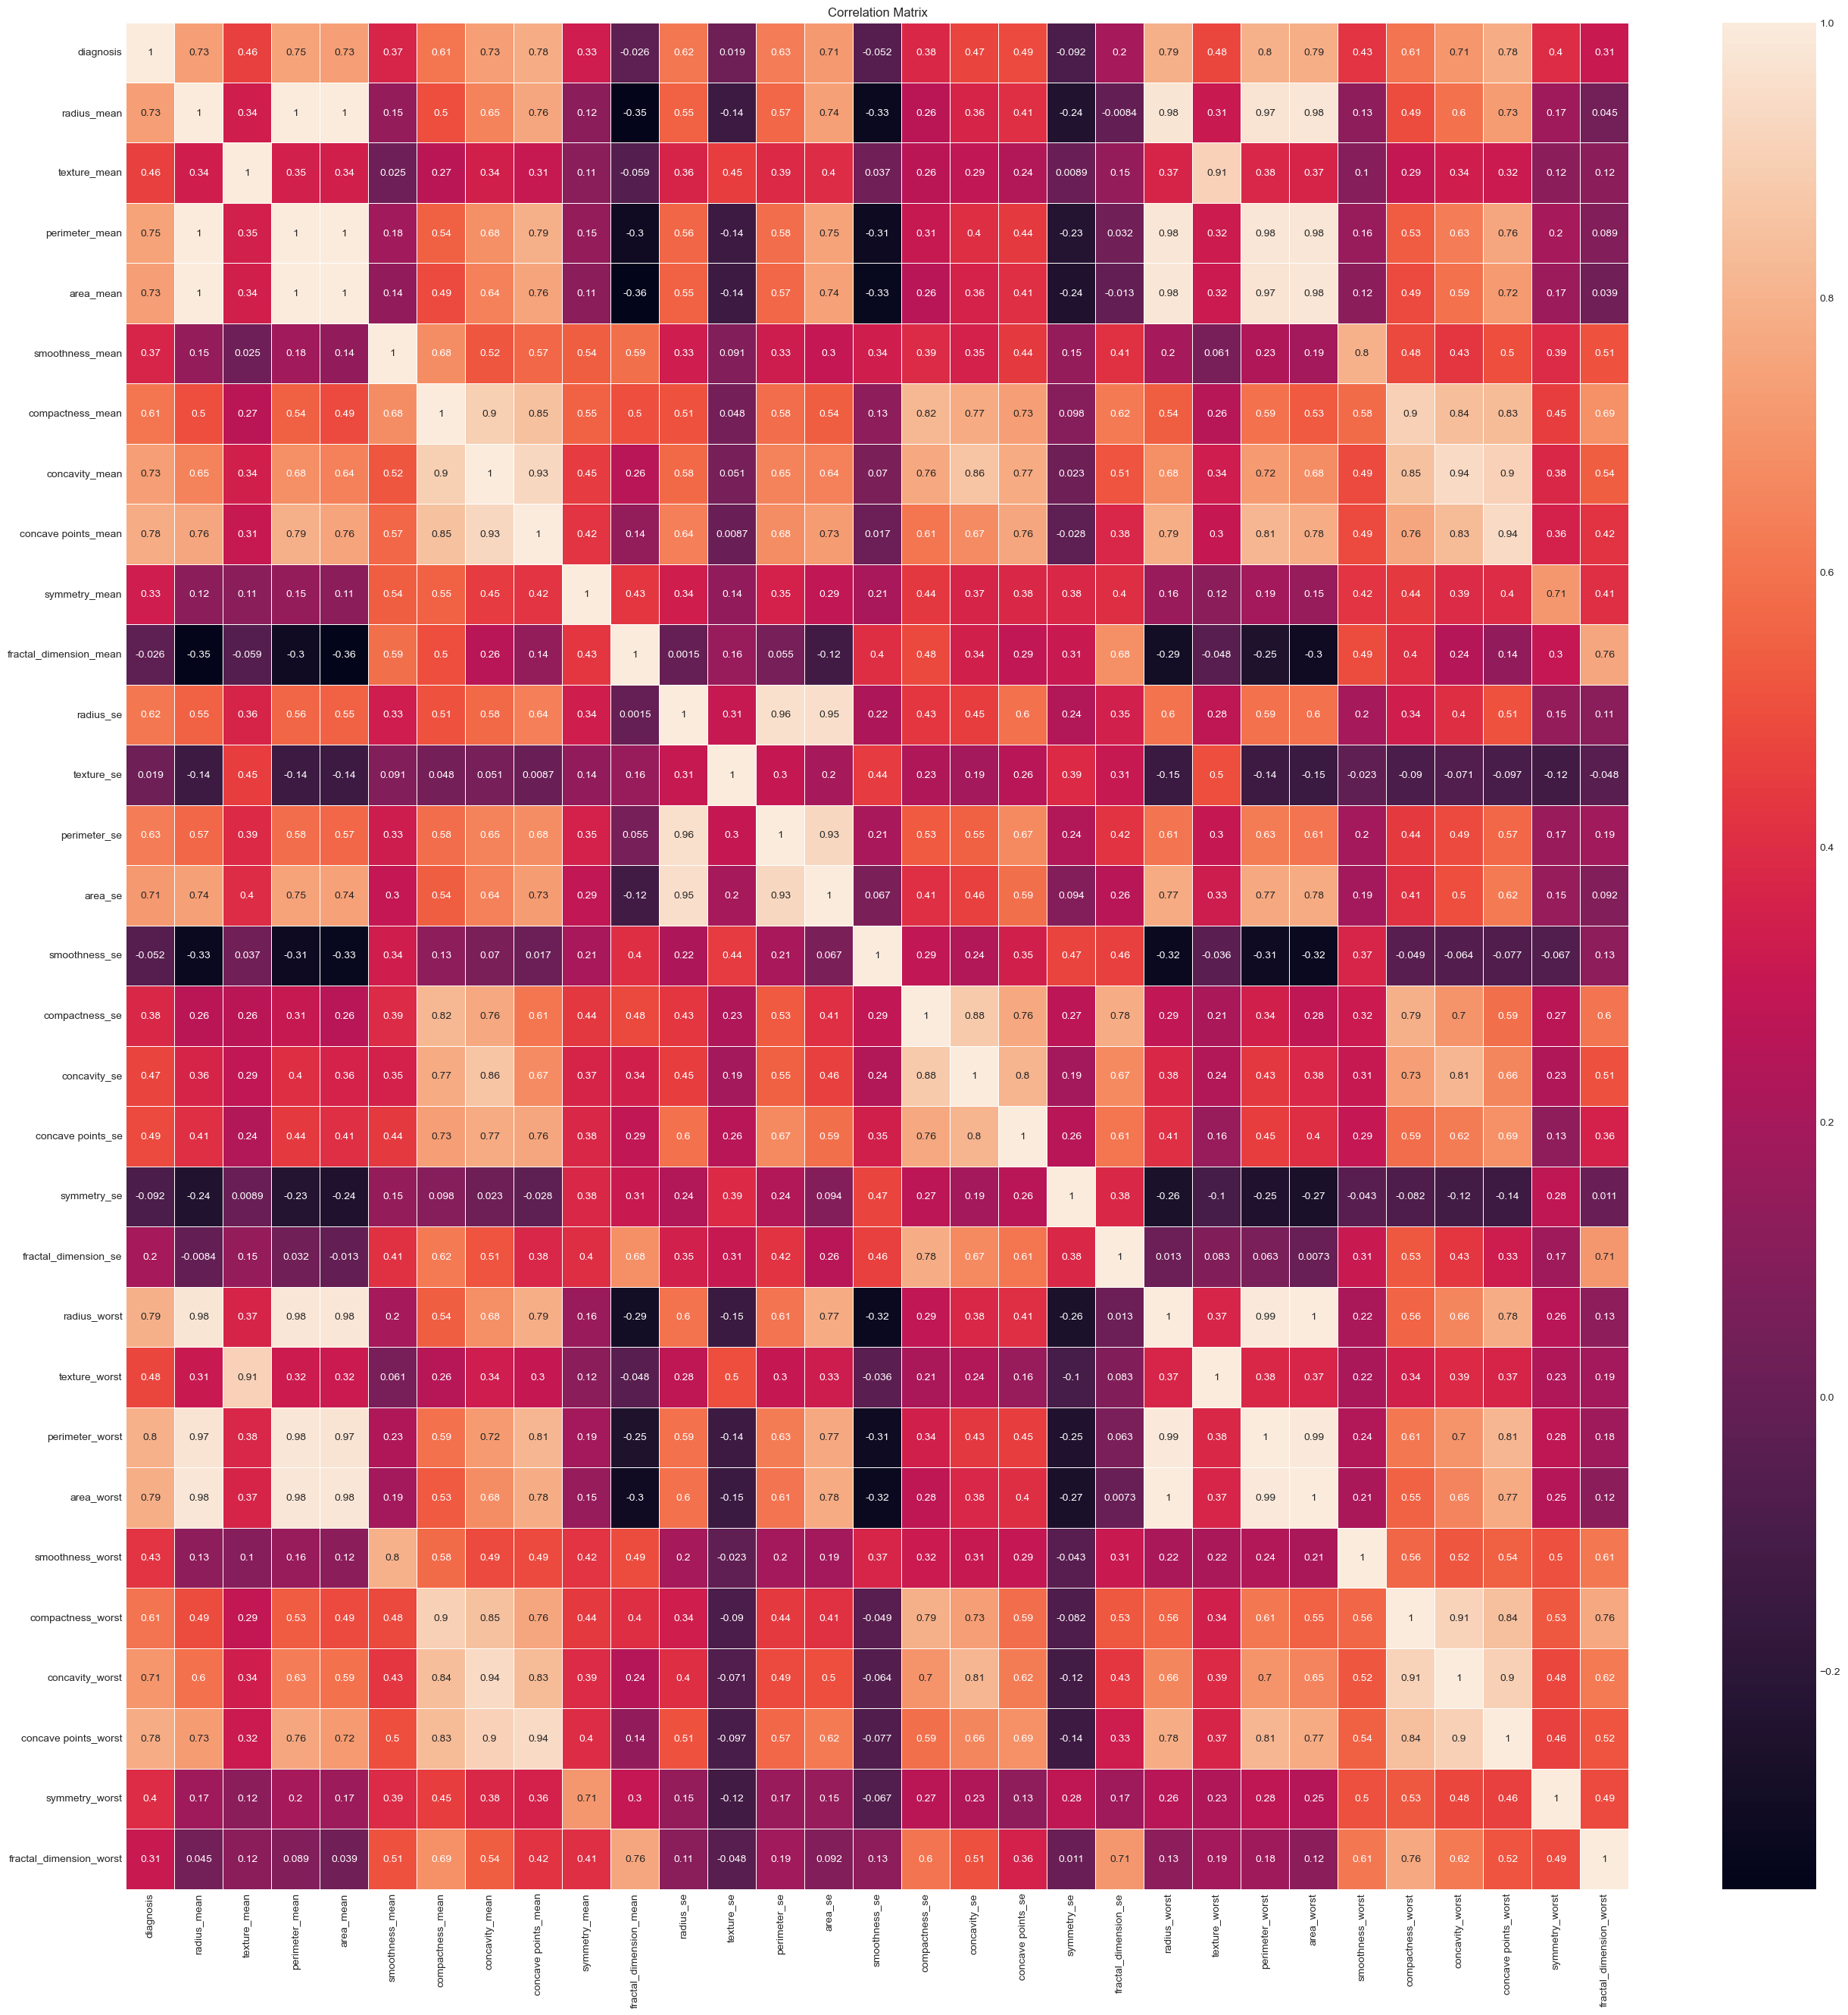

In [11]:
corr_df = df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(32,32))
sns.heatmap(corr_df, annot=True, linewidths=.5, ax=ax)
plt.title('Correlation Matrix')
plt.show()

The features that has the most correlation with target 'diagnosis' are all positively correlated with it. These features are perimeter, radius, area, concave points and it's describing attributes mean, worst and se.

'Perimeter_worst' has the most corrrelation(r=0.8) with diagnosis, this is followed by 'radius_worst' and 'area_worst' with r = 0.79 for both. 'concave points_worst' has correlation coefficient of 0.78. The feature that has the least correlation with 'diagnosis' is 'texture_se' with r=0.019.

The mean, se and worst attributes of radius, perimeter, area have high correlation(positive) with each other:


*   radius_mean & perimeter_mean: r = 1

*   radius_mean & area_mean: r = 1

*   perimeter_mean & area_mean: r = 1 

*   radius_se & perimeter_se: r = 0.96

*   radius_se & area_se: r = 0.95

*   perimeter_se & area_se: 0.93

This makes sense as all these attributes depend on each other, in that increase in one will also require an increase in the rest of them.

Infact the mean, se and worst attribute of a feature all have positive correlation with each other. For example for radius:


*   radius_mean & radius_worst: r = 0.98

*   radius_mean & radius_se: r = 0.55

*   radius_se & radius_worst: r = 0.6 

The mean and worst of feature has the most correlation, this makes sense as the worst of feature is the mean of the 3 largest values of that feature. Therfore it is likely to have high positive correlation with the mean of the feature.

##### Multicollinearity 

As shown earlier some features are heavily correlated with each other, we can visualize this by using pair plots. We will plot pairplots of the the top 20 features that has the most correlation(positive) with 'diagnosis'

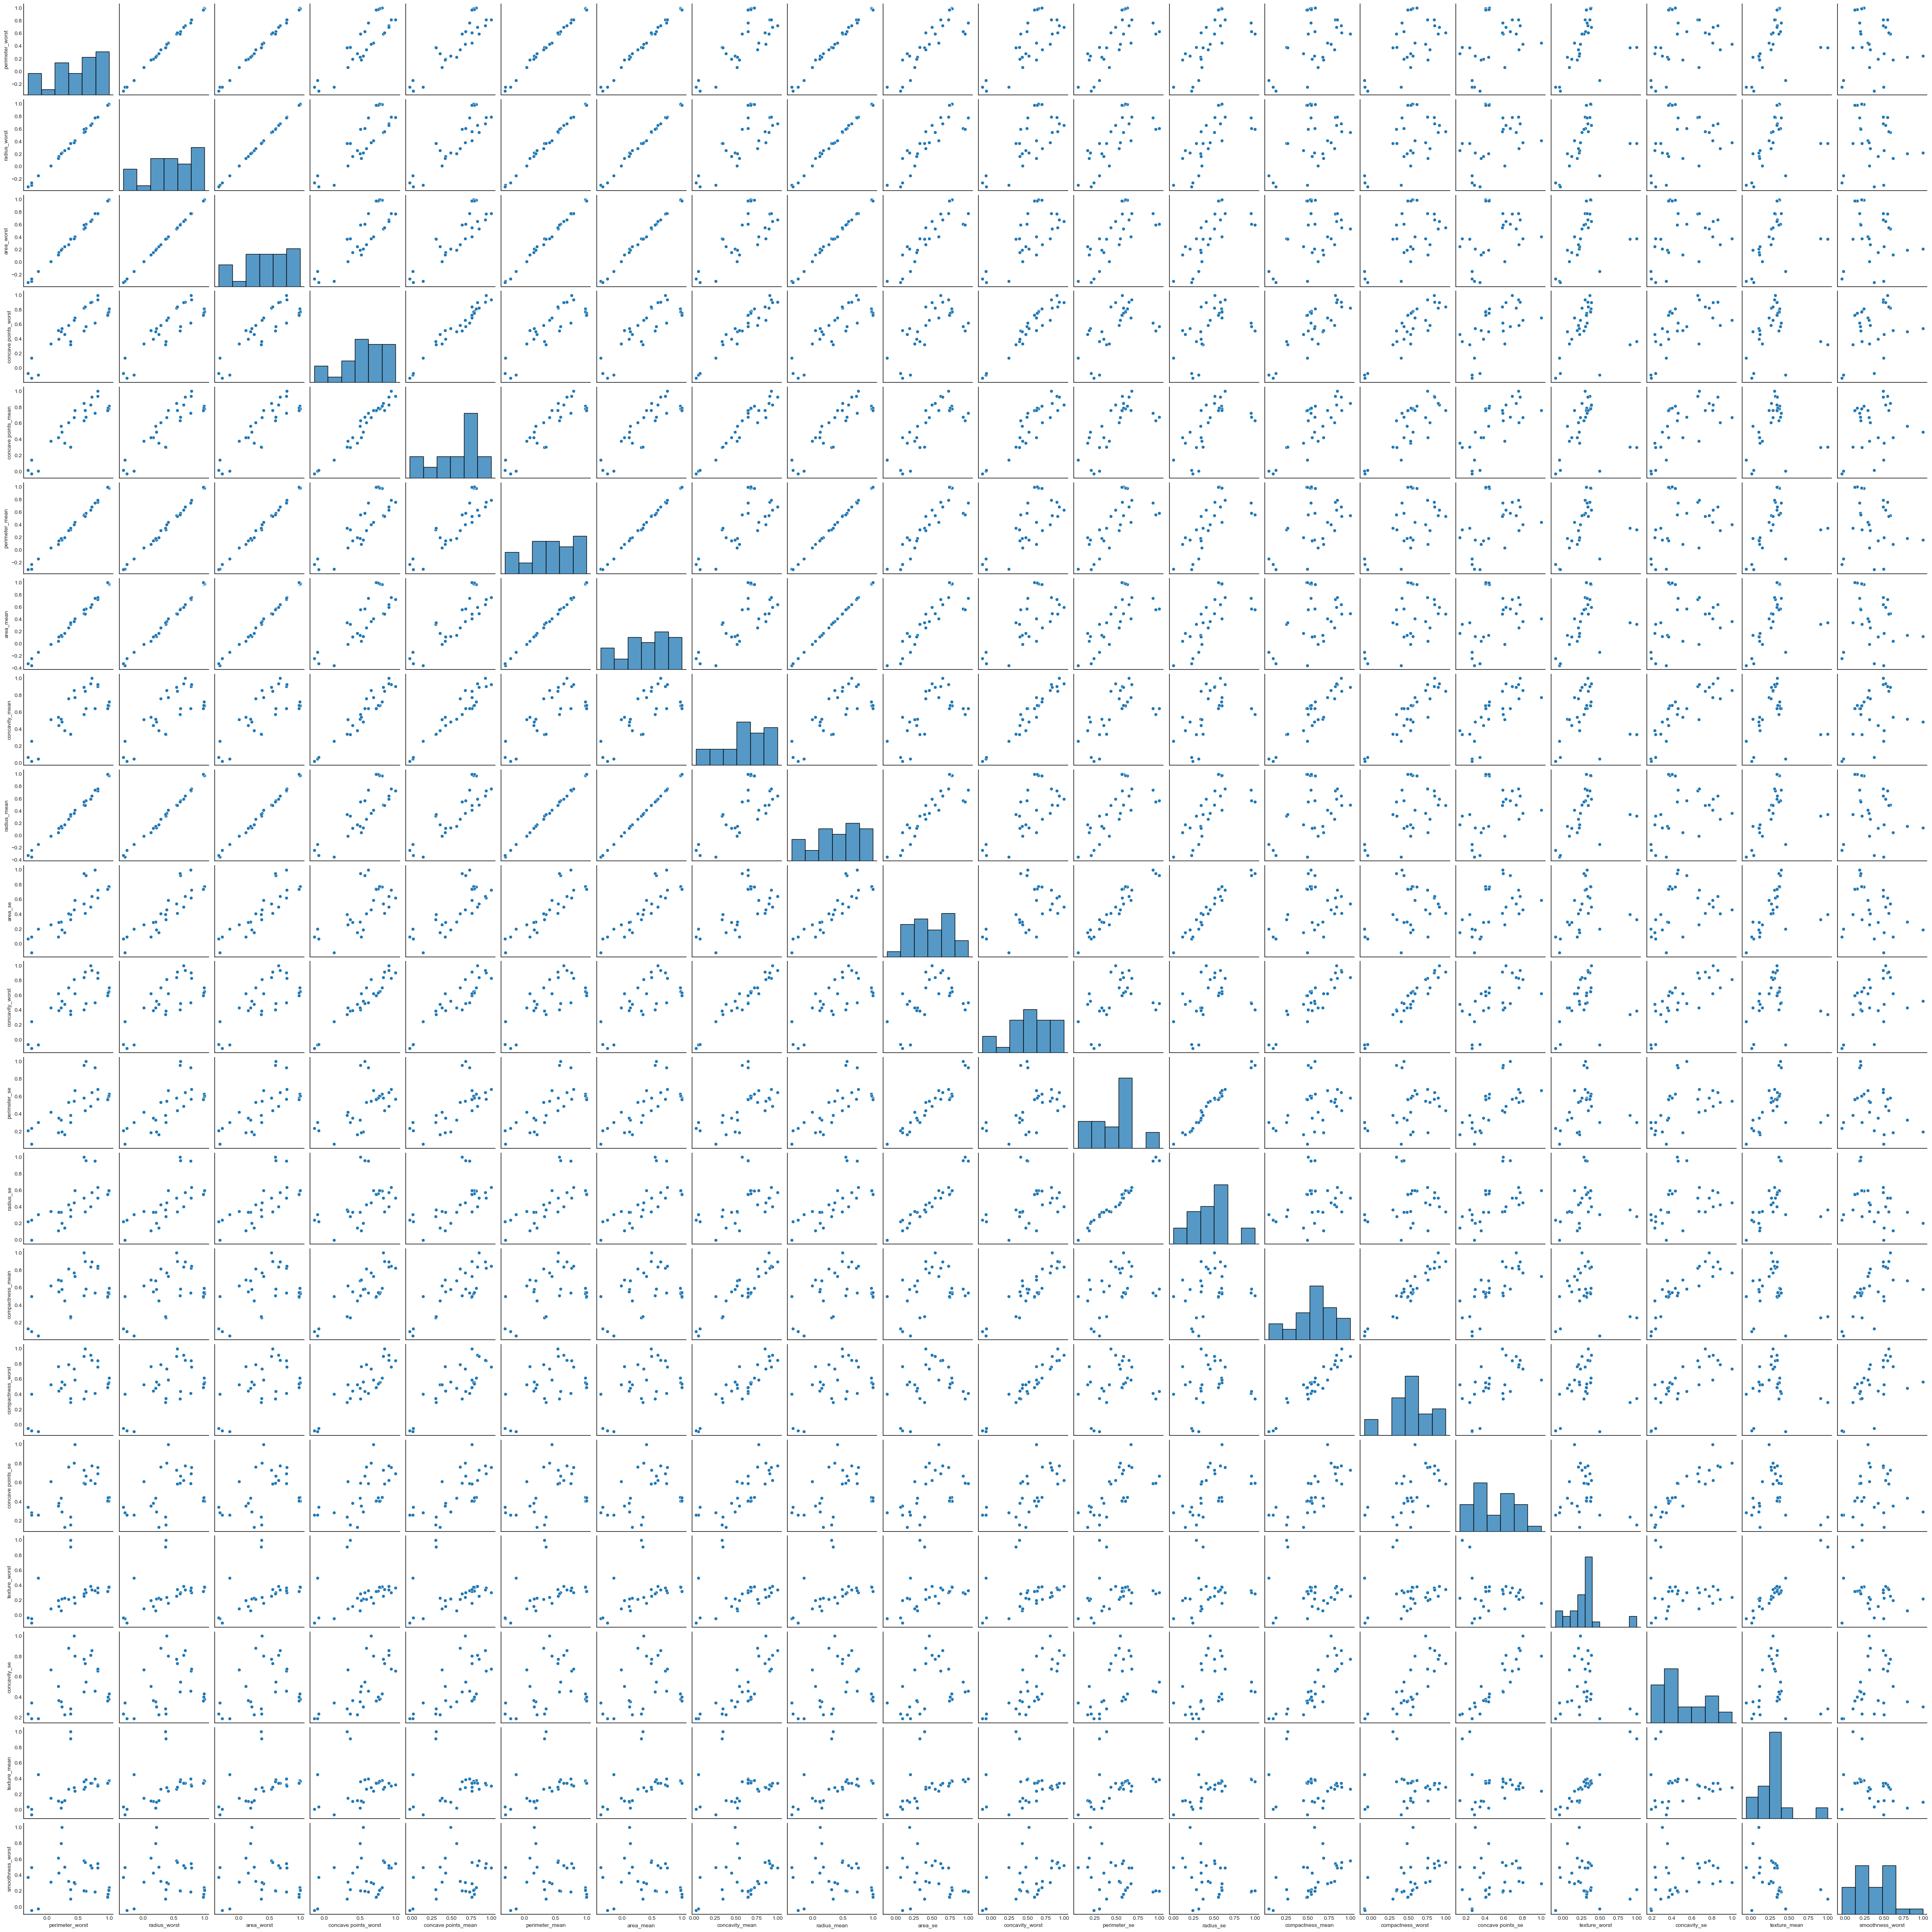

In [12]:
corr_df=corr_df.sort_values(by='diagnosis',ascending=False) #Sort it so the variables with the highest(positive) correlation with 'diagnosis' is at the top
corr_df = corr_df.drop('diagnosis').drop('diagnosis', axis=1) # drop target variable as we are only investigating multicollinearity
sns.pairplot(corr_df, vars=corr_df.head(20).index) #Pairplots of the top 20 variables

As shown above in the pairplots, the radius, perimeter and area are highly correlated with each others attributes except for the standard error 'se'.

Furthermore it also tells us the concave points is also not much correlated with area, radius and perimeter. However it is some noticeable correaltion with concavity. This makes sense as concave points and concavity are related to each other.

##### PCA For Dimensionality Reduction

Since the dataset has a lot of features(29) which are also correlated with each other PCA will be used to reduce these features into a smaller number that are not correlated with each other and at the same time explaining as much possible variance as without PCA.

In [13]:
X = df.drop('diagnosis', axis=1)
y = np.array(df['diagnosis'])

Scale the value using min max scaling so the all values of the dataset are in range 0 and 1. PCA is affected by scale hence this is required.

In [14]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X)
scaled_X = min_max_scaler.transform(X)

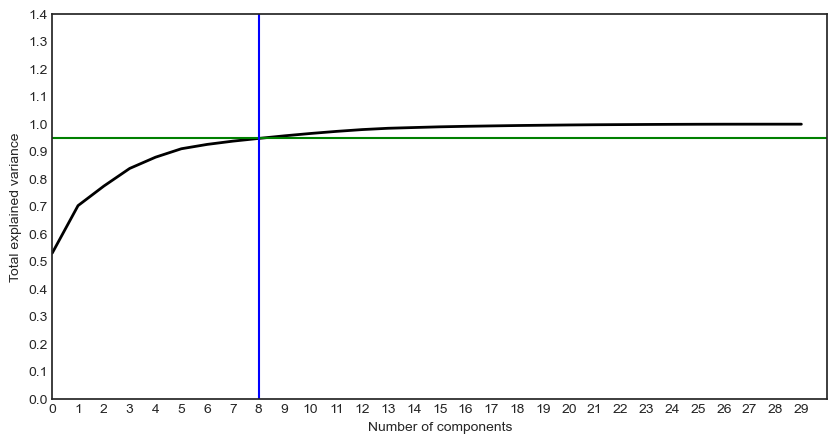

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_X)

#Plot graph of number components againsts the variance explained by them
#this will show us how many components we can reduce the dataset to without loosing much information
plt.figure(figsize=(10,5))
plt.plot(pca.explained_variance_ratio_.cumsum(), color='k', lw=2) #use cumsum to get the variance explained at each number of components 
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 30)
plt.xticks(np.arange(0, 30, 1))
plt.yticks(np.arange(0, 1.5, 0.1)) #plot graph with ticks from 0 to 1.5 with a tick at each 0.1 increments

plt.axhline(0.95, c='g')
plt.axvline(8, c='b')
plt.show();

In [16]:
pca = PCA(n_components=8) #Set number of components to 8
pca.fit(scaled_X)
pca_scaled_X = pca.transform(scaled_X)
df_pca =  pd.DataFrame(pca_scaled_X, columns=["Component" + str(i + 1) for i in range(8)])
df_pca

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8
0,1.387021,0.426895,-0.541703,0.048483,-0.072198,0.190817,0.236313,-0.039455
1,0.462308,-0.556947,-0.205175,-0.042830,0.016111,0.015604,0.043139,0.020644
2,0.954621,-0.109701,-0.147848,-0.001068,-0.033798,0.069062,-0.108166,0.007362
3,1.000816,1.525089,-0.053271,-0.207916,-0.219381,0.388007,0.194519,0.143499
4,0.626828,-0.302471,-0.409336,0.238811,-0.002192,-0.157212,-0.063308,0.045932
...,...,...,...,...,...,...,...,...
564,1.002840,-0.474785,-0.100041,0.272995,-0.083888,-0.309121,-0.129457,0.006007
565,0.620757,-0.517200,0.400360,0.182443,-0.092984,-0.046000,-0.083334,-0.111682
566,0.226311,-0.287946,0.315224,-0.011747,0.218517,-0.080005,-0.030991,0.015707
567,1.677834,0.335946,0.296116,-0.156305,0.070204,0.109057,0.068626,-0.092474


In [21]:
#New dataframes:
df_pca #PCA components

#scalers
min_max_scaler #used for scaling to create PCA components

MinMaxScaler()

The dataset is then split to train set and test set where train set contains 90% while test set contains the remaining 10%.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size = 0.1, train_size = 0.9, random_state = 32) #Split data to train test, use same random_state and train set size

### 4. Model Building and Model Evaluation

#### 4.1 Model Building Process Explanation

Two models chosen in this assignment come from two families, one from machine learning while the other from deep learning. Doing so, both models can be used as comparison and determined on which type of model is more suitable for this situation.

For machine learning, the model chosen is Decision Tree Classifier. This is because it is:
- easy to understand and interpret
- non-parametic since it does not make any asssumptions about the distribution of data
- versatile at handling both categorical and numerical data
- scalable with large datasets
- robust since it is less sensitive to outliers and noice

By defining and setting up the required fields for the model such as max_depth, max_leaf_nodes and max_features, the model is then fit with the train data. Then the illustration of the tree are shown. Lastly, the model's performance is then evaluated using train data and test data.

For deep learning, the model chosen is Convolutional Neural Network (CNN). Although it is primarily designed for image recognition and processing tasks, there are cases where CNN can also be useful for classification tasks on tabular data. This is because it is:
- capable of automatically extracting relevant features from input data
- robust to variations in input data such as translations, rotations and scale changes
- capable at handling high-dimensional input data efficiently
- efficient at memory utilization while training the model

Before building the model, the train set is splitted again to train set and validation set, making three different datasets in total, train set with 80%, validation set with 10% and test set with 10%. Validation set is used to validate the model's performance during training. The data used will be the generated principle components.

Then the data for train set, validation set and test set is then transformed into a 4D tensor with shape (samples = total samples, height = 1, width = number of features, channels = 1) which will be the input shape of the model. Then the model is defined with the required layers and then compiled using binary cross entropy due to the output is in binary format. Then the model is fit with train data and validated with validation data with a batch size of 32 and 40 epochs. After training, the model is evaluated with train data, validation data and test data. Data lost, accuracy and the summary of the model are also shown. 

#### 4.2 Machine Learning: Decision Tree Classifier Model

In [23]:
#general function for printing tree
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    # dot data as output file for visualisation later
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [24]:
# Define and compile the Decision Tree Classifier model
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=20, max_features=8)
# Train the model
clf.fit(X_train,y_train)

clf.score(X_train,y_train)

0.998046875

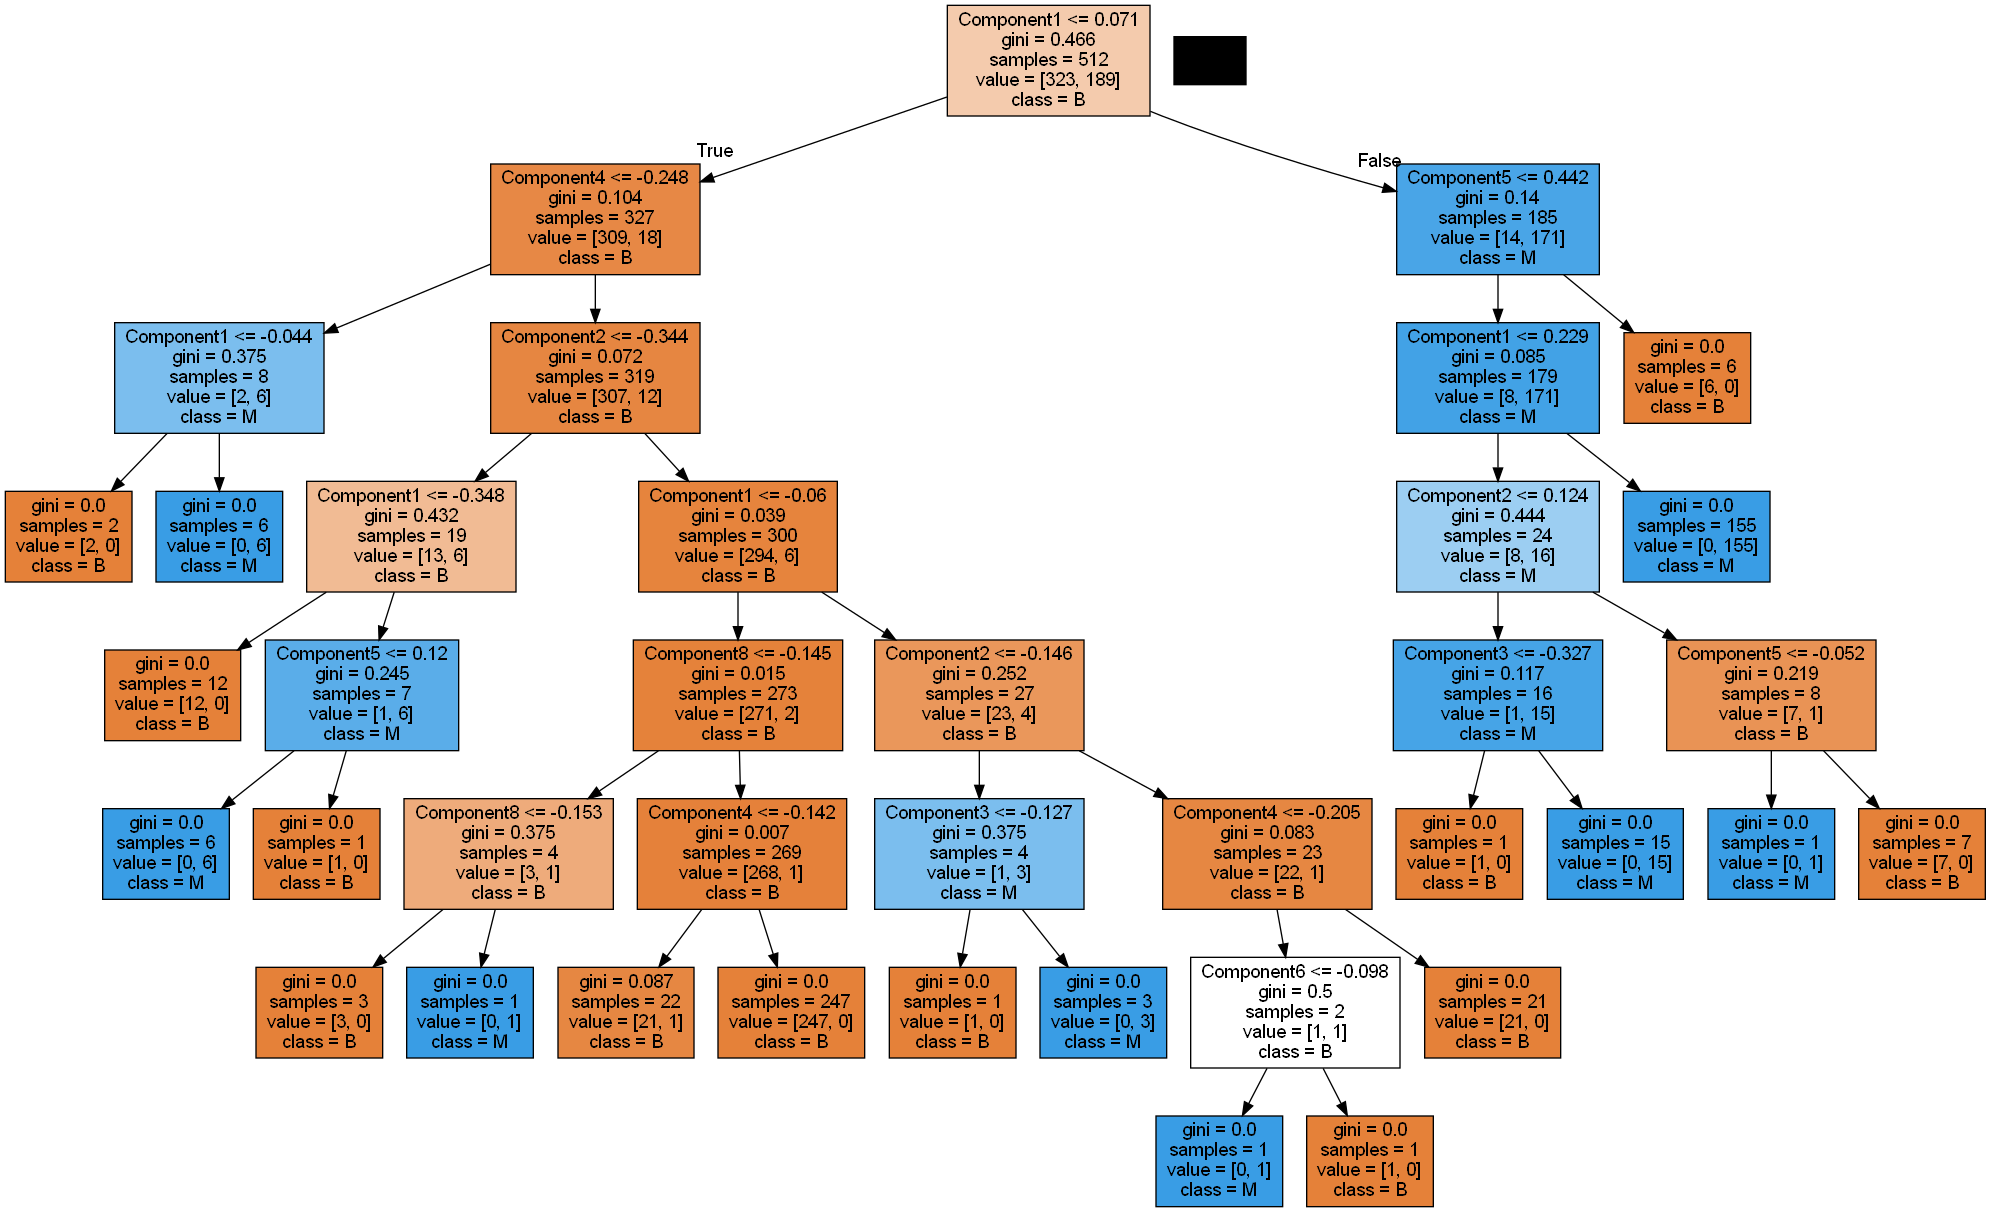

In [25]:
# Importance
features_name = df_pca.columns.tolist()

graph = print_tree(clf, features=features_name, class_names=['B', 'M'])

Image(graph.create_png())

In [26]:
# Train set
y_train_pred = clf.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      0.99      1.00       189

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512



In [27]:
cm = pd.DataFrame(confusion_matrix(y_train, y_train_pred).T, index=['B', 'M'], columns=['B', 'M'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,B,M
Predicted,,
B,323,1
M,0,188


In [28]:
# Test set
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.91      0.95        23

    accuracy                           0.96        57
   macro avg       0.97      0.96      0.96        57
weighted avg       0.97      0.96      0.96        57



In [29]:
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred).T, index=['B', 'M'], columns=['B', 'M'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,B,M
Predicted,,
B,34,2
M,0,21


In [30]:
# Predict using Decision Tree Classifier model on test set
test_no = 0

y_test_singular_pred = clf.predict(X_test.head(test_no+1))

if y_test_singular_pred == 0:
    predicted = 'Benign'
else:
    predicted = 'Malignant'
    
if y_test[test_no] == 0:
    actual = 'Benign'
else:
    actual = 'Malignant'
    
print('Predicted: ' + predicted)
print('Actual: ' + actual)

Predicted: Benign
Actual: Benign


#### 4.3 Deep Learning: CNN Model

In [31]:
#Split data to train test, use same random_state and train set size
X2_train, X2_val, y2_train, y2_val = train_test_split(X_train, y_train, test_size = 0.11, random_state = 32)

print('Training set size', len(y2_train))
print('Validation set size', len(y2_val))
print('Test set size', len(X_test))

Training set size 455
Validation set size 57
Test set size 57


In [32]:
# Reshape the input data to 4D tensor with shape (samples = total samples, height, width = number of features, channels)
# Making a 2D image using data where width = 30 (number of features), and height = 1
X2_train = np.array(X2_train).reshape(len(X2_train), 1, X2_train.shape[1], 1)
X2_val = np.array(X2_val).reshape(len(X2_val), 1, X2_val.shape[1], 1)
X2_test = np.array(X_test).reshape(len(X_test), 1, X_test.shape[1], 1)

In [33]:
# Define the CNN model
#Use dropout to reduce overfittig
cnn = Sequential()
cnn.add(Conv2D(16, kernel_size=(1, 3), activation='relu', input_shape=(1, X2_train.shape[2], 1))) 
cnn.add(Conv2D(32, kernel_size=(1, 3), activation='relu'))
cnn.add(Dropout(0.4))
cnn.add(MaxPooling2D(pool_size=(1, 2)))
cnn.add(Flatten())
cnn.add(Dense(16, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_pca = cnn.fit(X2_train, y2_train, epochs=40, batch_size=32, validation_data=(X2_val, y2_val))

# Evaluate the model
loss, accuracy = cnn.evaluate(X2_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/40
15/15 [==============================] - 1s 19ms/step - loss: 0.6847 - accuracy: 0.6220 - val_loss: 0.6662 - val_accuracy: 0.6667
Epoch 2/40
15/15 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6637 - val_loss: 0.6389 - val_accuracy: 0.6667
Epoch 3/40
15/15 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.6615 - val_loss: 0.6047 - val_accuracy: 0.6842
Epoch 4/40
15/15 [==============================] - 0s 4ms/step - loss: 0.5971 - accuracy: 0.6725 - val_loss: 0.5625 - val_accuracy: 0.7895
Epoch 5/40
15/15 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.7582 - val_loss: 0.5162 - val_accuracy: 0.7895
Epoch 6/40
15/15 [==============================] - 0s 3ms/step - loss: 0.5038 - accuracy: 0.8110 - val_loss: 0.4623 - val_accuracy: 0.8596
Epoch 7/40
15/15 [==============================] - 0s 4ms/step - loss: 0.4586 - accuracy: 0.8264 - val_loss: 0.4179 - val_accuracy: 0.8772
Epoch 8/40
15/15 [=

In [34]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 6, 16)          64        
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 4, 32)          1568      
                                                                 
 dropout (Dropout)           (None, 1, 4, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 2, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                        

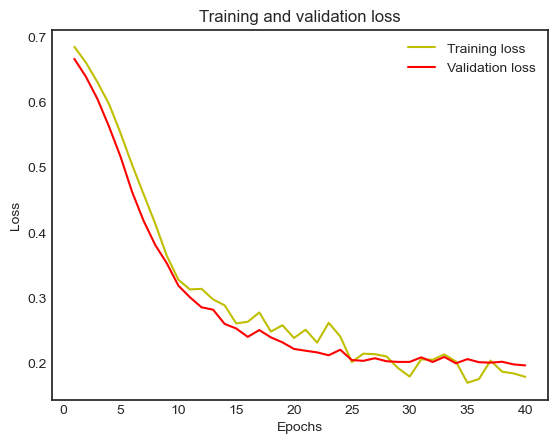

In [35]:
loss = history_pca.history['loss']
val_loss = history_pca.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

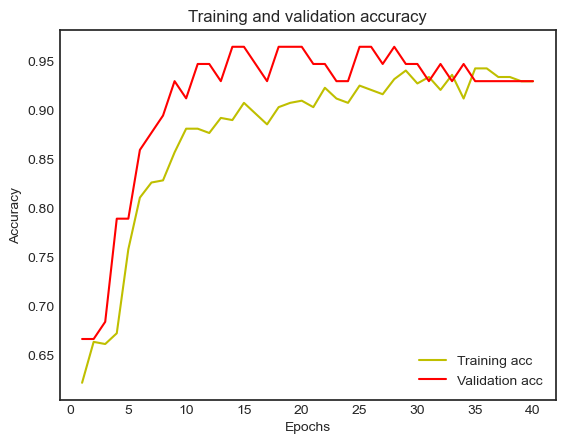

In [36]:
acc = history_pca.history['accuracy']
val_acc = history_pca.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
# Train set
y2_train_pred = cnn.predict(X2_train).round()
print(classification_report(y2_train, y2_train_pred))

15/15 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       286
           1       0.99      0.90      0.94       169

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455



In [38]:
cm = pd.DataFrame(confusion_matrix(y2_train, y2_train_pred).T, index=['B', 'M'], columns=['B', 'M'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,B,M
Predicted,,
B,285,17
M,1,152


In [39]:
# Validation set
y2_val_pred = cnn.predict(X2_val).round()
print(classification_report(y2_val, y2_val_pred))

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.90      0.90      0.90        20

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



In [40]:
cm = pd.DataFrame(confusion_matrix(y2_val, y2_val_pred).T, index=['B', 'M'], columns=['B', 'M'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,B,M
Predicted,,
B,35,2
M,2,18


In [41]:
# Test set
y2_test_pred = cnn.predict(X2_test).round()
print(classification_report(y_test, y2_test_pred))

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        34
           1       1.00      0.83      0.90        23

    accuracy                           0.93        57
   macro avg       0.95      0.91      0.92        57
weighted avg       0.94      0.93      0.93        57



In [42]:
cm = pd.DataFrame(confusion_matrix(y_test, y2_test_pred).T, index=['B', 'M'], columns=['B', 'M'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,B,M
Predicted,,
B,34,4
M,0,19


In [43]:
# Predict using CNN model on test set
test_no = 0

y2_test_singular_pred = cnn.predict(X2_test[[test_no]]).round()

if y2_test_singular_pred == 0:
    predicted = 'Benign'
else:
    predicted = 'Malignant'
    
if y_test[test_no] == 0:
    actual = 'Benign'
else:
    actual = 'Malignant'
    
print('Predicted: ' + predicted)
print('Actual: ' + actual)

1/1 [==============================] - 0s 22ms/step
Predicted: Benign
Actual: Benign


#### 4.4 Model Evaluation Result

The accuracies(on test data) of the models did not change as much based on the type of model meaning CNN model(93%) had somewhat similar accuracy to the Decision tree model(96%). Therefore to find out the best model we also need to look at the confusion matrix of the test data for each model. 

Furthermore as we are diagnosing whether a mass is malignant or not, it would be more important to make sure that we classify the actual malignant tumors as malignant. While both the CNN and Decision Tree classifier correctly classified all true benign samples correctly the decision tree classifier(false negative = 2) classified more malignant samples as malignant, making it the best performing model. The CNN model had 3 false negatives.

### 5. Cross-Validation

#### 5.1 Cross-Validation Process Explanation

Cross-validation is a technique used to evaluate the performance of a machine learning model by partitioning the data into subsets, training the model on one subset, and testing it on another. The basic idea is to use a subset of the data to train the model and another subset to evaluate its performance.

By doing cross-validation, it can help to:
- estimate the performance of the model on unseen data
- avoid overfitting
- choose the best model
- optimize model parameters
- evaluate and improve the performance of the models

K-fold cross-validation is used to cross validate both models, Decision Tree Classifier and CNN. K-fold is chosen as it is one of the most widely used cross-validation techniques. The data is split into k subsets of equal size. The model is trained on k-1 subsets and tested on the remaining subset. This process is repeated k times, with each subset used once for testing. K is set to 5 in this case.

For Decision Tree Classifier, the model is compiled and then run through cross-validation. Initially, the train set is splitted to both fold train and fold test set for the current fold. During each fold, the model is fit with the current fold train set and then evaluated with the current fold test set. Each fold's accuracy, TP, FP, FN and TN is also recorded to calculate the average performance of the model and create a confusion matrix. Lastly, the model is then evaluated with the test set.

For CNN, the model is compiled and then run through cross-validation. Initially, the train set is splitted to both fold train and fold test set for the current fold. During each fold, the model is fit with the current fold train set with the validation set as the validation data. Then the model is evaluated with the current fold test set. Each fold's accuracy, loss, TP, FP, FN and TN are also recorded to calculate the average performance of the model and create a confusion matrix. Lastly, the model is then evaluated with the test set.

#### 5.2 Decision Tree Classifier Cross-Validation

In [44]:
# Define the number of folds for cross-validation
num_folds = 5

# Define the K-fold cross-validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [45]:
# Define and compile the Decision Tree Classifier model
clf2 = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=20, max_features=8)

In [46]:
# Define a list to store the performance metric (e.g. accuracy) obtained for each fold
acc_metric = []

fold_test_tp = []
fold_test_fp = []
fold_test_fn = []
fold_test_tn = []

In [47]:
# Train and evaluate the Decision Tree Classifier using K-fold cross-validation
fold_no = 1

for train_idx, test_idx in kfold.split(X_train, y_train):
    # Split the training and test data for this fold
    x_train_fold, x_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]
    
    # Train the model
    clf2.fit(x_train_fold,y_train_fold)
    accuracy = clf2.score(x_test_fold,y_test_fold)
    
    # Store TP, FP, FN and TN for test fold
    y_test_fold_pred = clf2.predict(x_test_fold)
    cm = confusion_matrix(y_test_fold, y_test_fold_pred)
    
    fold_test_tp.append(cm[0][0])
    fold_test_fp.append(cm[0][1])
    fold_test_fn.append(cm[1][0])
    fold_test_tn.append(cm[1][1])
    
    # Store the performance metric obtained for this fold
    acc_metric.append(accuracy)
    
    print("Fold: ", fold_no)
    print("Test Accuracy:", accuracy)
    fold_no += 1    

Fold:  1
Test Accuracy: 0.9223300970873787
Fold:  2
Test Accuracy: 0.9029126213592233
Fold:  3
Test Accuracy: 0.9313725490196079
Fold:  4
Test Accuracy: 0.9803921568627451
Fold:  5
Test Accuracy: 0.9509803921568627


In [48]:
# Performance across folds
avg_acc_metric = np.mean(acc_metric)

print('Average Accuracy: ', avg_acc_metric)

Average Accuracy:  0.9375975632971636


In [49]:
# Confusion matrix for all test folds
test_fold_cm = np.array([[sum(fold_test_tp),sum(fold_test_fn)], 
                             [sum(fold_test_fp),sum(fold_test_tn)]])

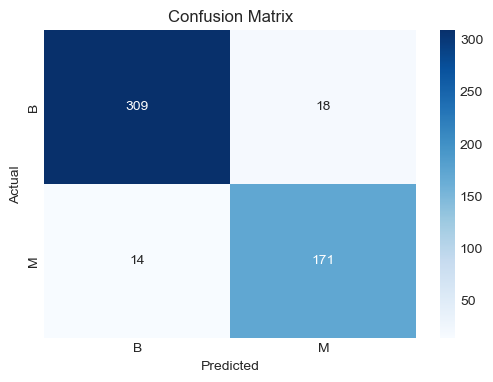

In [50]:
# Plot the confusion matrix
labels = ['B', 'M']
plt.figure(figsize=(6, 4))
sns.heatmap(test_fold_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

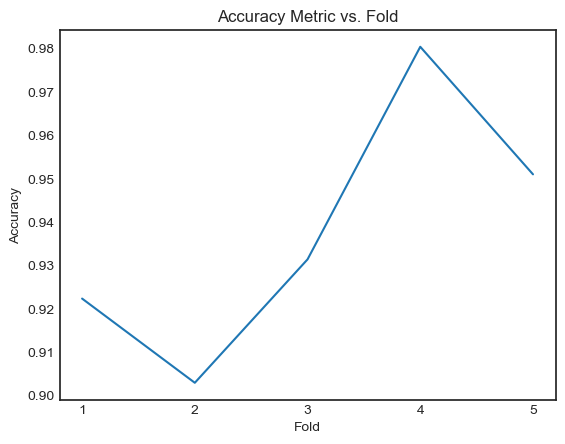

In [51]:
# Plot the performance metric obtained for each fold using a line plot
plt.plot(acc_metric)
plt.title('Accuracy Metric vs. Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(acc_metric)), np.arange(1, len(acc_metric)+1))
plt.show()

In [52]:
# Test the model on the independent testing set
y_cross_pred = clf2.predict(X_test)
print(classification_report(y_test, y_cross_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.91      0.95        23

    accuracy                           0.96        57
   macro avg       0.97      0.96      0.96        57
weighted avg       0.97      0.96      0.96        57



In [53]:
cm = pd.DataFrame(confusion_matrix(y_test, y_cross_pred).T, index=['B', 'M'], columns=['B', 'M'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,B,M
Predicted,,
B,34,2
M,0,21


#### 5.3 CNN Cross-Validation

In [54]:
# Define a list to store the performance metric (e.g. accuracy) obtained for each fold
acc_metric2 = []
loss_metric2 = []

fold_test2_tp = []
fold_test2_fp = []
fold_test2_fn = []
fold_test2_tn = []

In [55]:
# Define the CNN model
#Use dropout to reduce overfittig
cnn2 = Sequential()
cnn2.add(Conv2D(16, kernel_size=(1, 3), activation='relu', input_shape=(1, X2_train.shape[2], 1))) 
cnn2.add(Conv2D(32, kernel_size=(1, 3), activation='relu'))
cnn2.add(Dropout(0.4))
cnn2.add(MaxPooling2D(pool_size=(1, 2)))
cnn2.add(Flatten())
cnn2.add(Dense(16, activation='relu'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# Train and evaluate the CNN using K-fold cross-validation
fold_no = 1

for train_idx, test_idx in kfold.split(X2_train, y2_train):
    # Split the training and test data for this fold
    x_train_fold, x_test_fold = X2_train[train_idx], X2_train[test_idx]
    y_train_fold, y_test_fold = y2_train[train_idx], y2_train[test_idx]

    # Train the model
    cnn2.fit(x_train_fold, y_train_fold, batch_size=32, epochs=40, 
             validation_data=(X2_val, y2_val))

    # Evaluate the model on the validation set
    loss, accuracy = cnn2.evaluate(x_test_fold, y_test_fold)
    
    # Store TP, FP, FN and TN for test fold
    y_test_fold_pred = cnn2.predict(x_test_fold).round()
    cm = confusion_matrix(y_test_fold, y_test_fold_pred)
    
    fold_test2_tp.append(cm[0][0])
    fold_test2_fp.append(cm[0][1])
    fold_test2_fn.append(cm[1][0])
    fold_test2_tn.append(cm[1][1])
    
    # Store the performance metric obtained for this fold
    acc_metric2.append(accuracy)
    loss_metric2.append(loss)
    
    print("Fold: ", fold_no)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)
    fold_no += 1

Epoch 1/40
12/12 [==============================] - 1s 19ms/step - loss: 0.6915 - accuracy: 0.6236 - val_loss: 0.6766 - val_accuracy: 0.6491
Epoch 2/40
12/12 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.6291 - val_loss: 0.6612 - val_accuracy: 0.6491
Epoch 3/40
12/12 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.6291 - val_loss: 0.6426 - val_accuracy: 0.6491
Epoch 4/40
12/12 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.6291 - val_loss: 0.6246 - val_accuracy: 0.6491
Epoch 5/40
12/12 [==============================] - 0s 4ms/step - loss: 0.6257 - accuracy: 0.6319 - val_loss: 0.6038 - val_accuracy: 0.6491
Epoch 6/40
12/12 [==============================] - 0s 4ms/step - loss: 0.6055 - accuracy: 0.6374 - val_loss: 0.5815 - val_accuracy: 0.6842
Epoch 7/40
12/12 [==============================] - 0s 4ms/step - loss: 0.5772 - accuracy: 0.6841 - val_loss: 0.5516 - val_accuracy: 0.7193
Epoch 8/40
12/12 [=

Epoch 18/40
12/12 [==============================] - 0s 5ms/step - loss: 0.1353 - accuracy: 0.9451 - val_loss: 0.2406 - val_accuracy: 0.9123
Epoch 19/40
12/12 [==============================] - 0s 4ms/step - loss: 0.1659 - accuracy: 0.9341 - val_loss: 0.2361 - val_accuracy: 0.9298
Epoch 20/40
12/12 [==============================] - 0s 5ms/step - loss: 0.1612 - accuracy: 0.9451 - val_loss: 0.2413 - val_accuracy: 0.9123
Epoch 21/40
12/12 [==============================] - 0s 5ms/step - loss: 0.1688 - accuracy: 0.9451 - val_loss: 0.2370 - val_accuracy: 0.9298
Epoch 22/40
12/12 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9533 - val_loss: 0.2399 - val_accuracy: 0.9123
Epoch 23/40
12/12 [==============================] - 0s 5ms/step - loss: 0.1510 - accuracy: 0.9423 - val_loss: 0.2495 - val_accuracy: 0.9123
Epoch 24/40
12/12 [==============================] - 0s 4ms/step - loss: 0.1395 - accuracy: 0.9451 - val_loss: 0.2371 - val_accuracy: 0.9298
Epoch 25/40
1

Epoch 35/40
12/12 [==============================] - 0s 4ms/step - loss: 0.1296 - accuracy: 0.9505 - val_loss: 0.1869 - val_accuracy: 0.9298
Epoch 36/40
12/12 [==============================] - 0s 5ms/step - loss: 0.1445 - accuracy: 0.9451 - val_loss: 0.1836 - val_accuracy: 0.9298
Epoch 37/40
12/12 [==============================] - 0s 4ms/step - loss: 0.1206 - accuracy: 0.9615 - val_loss: 0.1832 - val_accuracy: 0.9298
Epoch 38/40
12/12 [==============================] - 0s 4ms/step - loss: 0.1198 - accuracy: 0.9533 - val_loss: 0.1911 - val_accuracy: 0.9298
Epoch 39/40
12/12 [==============================] - 0s 5ms/step - loss: 0.1257 - accuracy: 0.9643 - val_loss: 0.1980 - val_accuracy: 0.9298
Epoch 40/40
3/3 [==============================] - 0s 9ms/step
Fold:  3
Test Loss: 0.054391901940107346
Test Accuracy: 0.9890109896659851
Epoch 1/40
12/12 [==============================] - 0s 8ms/step - loss: 0.1120 - accuracy: 0.9533 - val_loss: 0.1998 - val_accuracy: 0.9298
Epoch 2/40
12/12 

In [57]:
# Performance across folds
avg_acc_metric2 = np.mean(acc_metric2)
avg_loss_metric2 = np.mean(loss_metric2)

print('Average Accuracy: ', avg_acc_metric2)
print('Average Loss: ', avg_loss_metric2)

Average Accuracy:  0.9670329689979553
Average Loss:  0.10253588482737541


In [58]:
# Confusion matrix for all test folds
test_fold2_cm = np.array([[sum(fold_test2_tp),sum(fold_test2_fn)], 
                             [sum(fold_test2_fp),sum(fold_test2_tn)]])

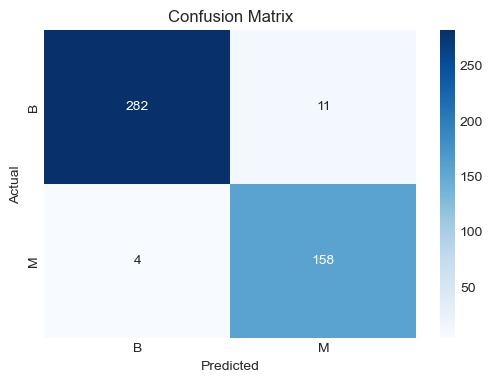

In [59]:
# Plot the confusion matrix
labels = ['B', 'M']
plt.figure(figsize=(6, 4))
sns.heatmap(test_fold2_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

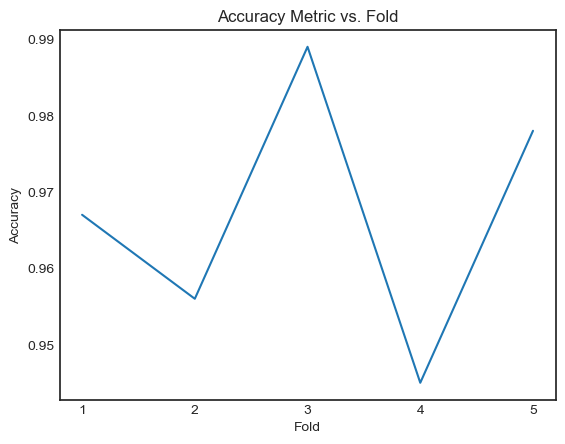

In [60]:
# Plot the performance metric obtained for each fold using a line plot
plt.plot(acc_metric2)
plt.title('Accuracy Metric vs. Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(acc_metric2)), np.arange(1, len(acc_metric2)+1))
plt.show()

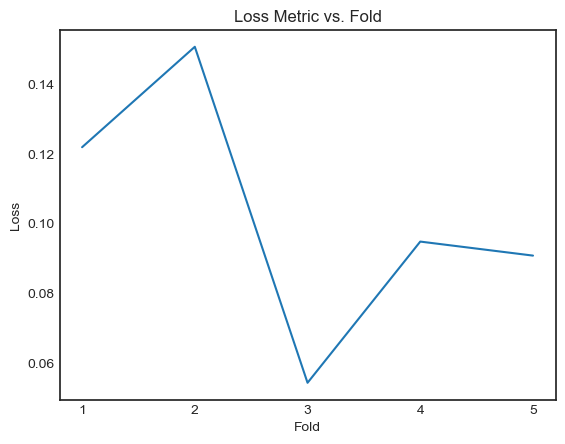

In [61]:
plt.plot(loss_metric2)
plt.title('Loss Metric vs. Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.xticks(np.arange(len(loss_metric2)), np.arange(1, len(loss_metric2)+1))
plt.show()

In [62]:
# Test the model on the independent testing set
loss, accuracy = cnn2.evaluate(X2_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2/2 [==============================] - 0s 9ms/step - loss: 0.1223 - accuracy: 0.9474
Test Loss: 0.1223190650343895
Test Accuracy: 0.9473684430122375


In [63]:
y2_cross_pred = cnn2.predict(X2_test).round()
print(classification_report(y_test, y2_cross_pred))

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.87      0.93        23

    accuracy                           0.95        57
   macro avg       0.96      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57



In [64]:
cm = pd.DataFrame(confusion_matrix(y_test, y2_cross_pred).T, index=['B', 'M'], columns=['B', 'M'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,B,M
Predicted,,
B,34,3
M,0,20


### 6. Discussion

After cross-validating through 5-folds, the average accuracy for CNN is better than Decision Tree Classifier with 96.73% for CNN and 93.76% for Decision Tree Classifier. This shows that CNN has higher stability and consistency compared to Decision Tree Classifier. However on the test set, Decision Tree Classifier has a higher accuracy with 96% rather than 94.74% with CNN.

Comparing both results CNN models' test performance, its accuracy has increased from 93% that was gotten from the first model to 96.73% on the average test fold and 94.74% on the test set from the second model. This can be due to overfitting when training the CNN model as during k-fold validation, the model is trained with fewer data as the train set is further break down to train set and test set for the fold. This is true as CNNs are parameter-intensive models, and their architecture assumes that neighboring data points share similar features. In tabular data, where features are usually independent and may not exhibit strong spatial correlations, the large number of parameters in a CNN may not be efficiently utilized. This can lead to overfitting or inefficient use of computational resources.

On the other hand, Decision Tree Classifier's test accuracy from the first model is higher than the average test fold accuracy from the second model, with 96% and 93.76%, but still the same accuracy on test set with 96%. This can be due to insufficient of data when training the model as the train data is breakdown, making it smaller. Thus, the model may not have enough examples to learn the underlying patterns effectively. This can lead to poor generalization and lower test accuracy. In both cases, CNN and Decision Tree, having more training data may help in improving the performance of the model. Furthmore using a less complex CNN with smaller number of parameters should also be investigated to see whether it provides better performance.

It is also important to note that while using PCA provides us with better performing models, it also makes it less interpretable. As we can not identify how much each feature contributes to the explained variance. On the other selecting features through the correlation analysis and investigating multicollinearity will give us more interpretability at the cost of accuracy.

### 7. Team contribution

| Name | Tasks Contributed | Contribution Percentage Overall Submission |
| --- | --- | --- |
| Peter Tiew Hieng TING (101226836) | Do Write Ups as Required, Model Building, Model Evaluation, Cross Validation | 50 |
| Vibatha Naveen Jayakody JAYAKODY ARACHCHILAGE (101232163) | Do Write Ups as Required, EDA, Model Building | 50 |